In [3]:
import pandas as pd #데이터 구성
import numpy as np #행렬 연산

import matplotlib as mpl
import matplotlib.pyplot as plt #데이터 시각화
import matplotlib.font_manager as fm

mpl.rc('font', family = "AppleGothic")
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

import seaborn as sns
import math

from scipy import stats
import statsmodels.api as sm

from sklearn.tree import export_graphviz
import graphviz

from sklearn import preprocessing
from statsmodels.stats.proportion import proportions_ztest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# 데이터 전처리(범주형 데이터)

In [5]:
#데이터 경로는 본인의 데이터 파일 경로로 지정하셔야 합니다.
df_raw = pd.read_csv("/Users/wonho/Temp/Hustar_ICT심화트랙/dataset.csv",engine="python", encoding = "EUC-KR")
df_raw 

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조
5,PB562779,2008-08-01:00:02:06,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1143,127,1128,57,314,1128,874,적용,8,4조
6,PB562780,2008-08-01:00:02:28,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,...,1138,126,1130,50,289,1130,878,적용,8,2조
7,PB562781,2008-08-01:00:02:21,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,...,1139,126,1131,52,294,1131,870,적용,8,4조
8,PB562782,2008-08-01:00:02:51,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,2호기,...,1127,126,1122,52,293,1122,873,적용,8,1조
9,PB562783,2008-08-01:00:03:15,양품,COMMON,T8,38.43,3129,16187,15280,2호기,...,1135,119,1124,73,298,1124,881,적용,8,4조


In [98]:
#결측치 확인
df_raw.isnull().sum(axis=0)

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [99]:
# 변수 제거 무의미하다고 생각되는 변수를 제거
df_raw.drop("PLATE_NO",axis=1,inplace=True)
df_raw.drop("ROLLING_DATE",axis=1,inplace=True)
#df_raw.drop("SPEC",axis=1,inplace=True)
df_raw.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934,적용,8,2조
1,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1135,937,적용,8,2조
2,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1121,889,적용,8,3조
3,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1127,885,적용,8,3조
4,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1128,873,적용,8,1조


In [100]:
#SCALE 양품/불량, HSB 적용/미적용을 0/1의 값으로 변경
df_raw["SCALE"] = np.where(df_raw["SCALE"]=="불량",1,0)
df_raw["HSB"] = np.where(df_raw["HSB"]=="적용",1,0)

In [101]:
#더미변수 생성 - 명목변수는 더미 변수를 통해 처리
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,...,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0,32.25,3707,15109,14180,1,1144,116,1133,59,...,0,0,0,1,0,0,0,1,0,0
1,0,32.25,3707,15109,14180,2,1144,122,1135,53,...,0,0,0,1,0,0,0,1,0,0
2,0,33.27,3619,19181,18130,1,1129,116,1121,55,...,0,0,1,0,1,0,0,0,1,0
3,0,33.27,3619,19181,18130,2,1152,125,1127,68,...,0,0,1,0,1,0,0,0,1,0
4,0,38.33,3098,13334,12430,1,1140,134,1128,48,...,0,0,1,0,0,1,1,0,0,0


In [102]:
#SCALE 불량 유무를 목표 변수(y)로 설정
df_raw_y = df_raw_dummy["SCALE"] #목표 변수 설정
df_raw_x = df_raw_dummy.drop("SCALE", axis = 1, inplace = False) #설명 변수 데이터 지정

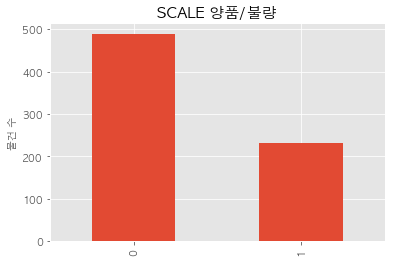

In [103]:
df_bar0 = df_raw["SCALE"].value_counts()
plt.style.use("ggplot")
plt.title("SCALE 양품/불량", fontsize = 15)
plt.ylabel("물건 수", fontsize = 10)
df_bar0.plot.bar()

Text(0, 0.5, '수량')

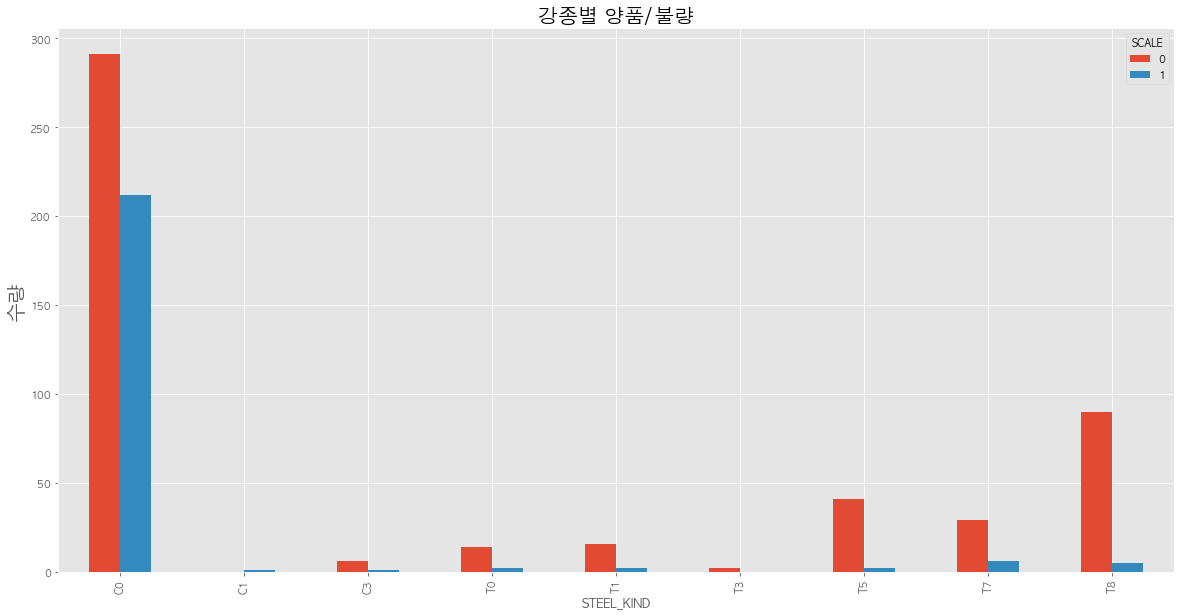

In [104]:
df_bar1 = df_raw.groupby(["SCALE", "STEEL_KIND"])["SCALE"].count().unstack("SCALE")
df_bar1.plot(kind = "bar", figsize = (20, 10))
plt.style.use("ggplot")
plt.title("강종별 양품/불량", fontsize = 20)
plt.ylabel("수량", fontsize = 20)

In [105]:
#강종에 대부분을 차지하는 C0를 제외한 다른 강종들의 불량율이 극히 미미하기 때문에 변수에서 제외.

Text(0, 0.5, '수량')

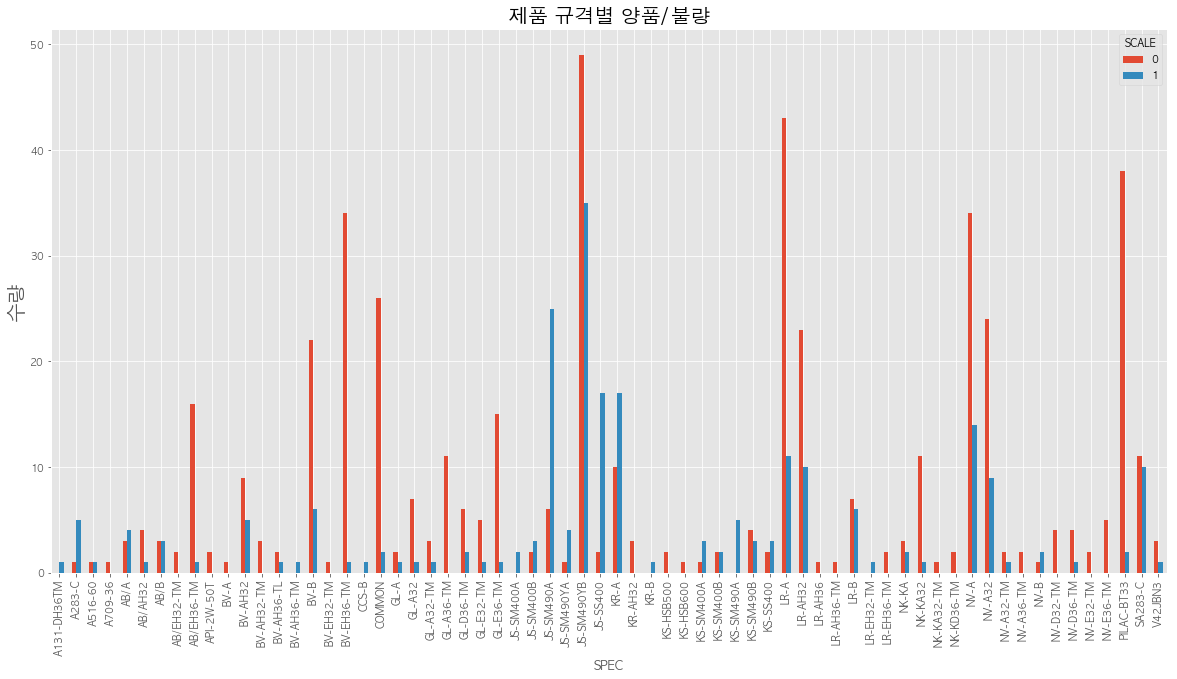

In [106]:
df_bar1 = df_raw.groupby(["SCALE", "SPEC"])["SCALE"].count().unstack("SCALE")
df_bar1.plot(kind = "bar", figsize = (20, 10))
plt.style.use("ggplot")
plt.title("제품 규격별 양품/불량", fontsize = 20)
plt.ylabel("수량", fontsize = 20)

In [107]:
#특정 규격별로 불량율의 차이가 매우 크므로 변수로써 의미가 있을 것이라 판단됨.

Text(0, 0.5, '수량')

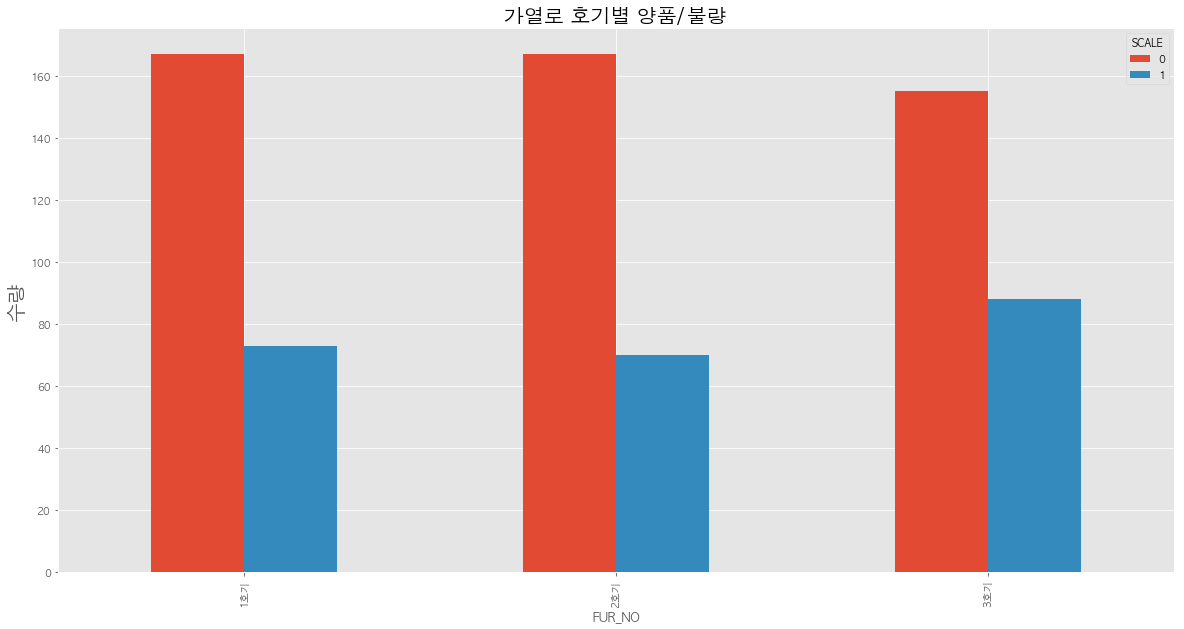

In [108]:
df_bar1 = df_raw.groupby(["SCALE", "FUR_NO"])["SCALE"].count().unstack("SCALE")
df_bar1.plot(kind = "bar", figsize = (20, 10))
plt.style.use("ggplot")
plt.title("가열로 호기별 양품/불량", fontsize = 20)
plt.ylabel("수량", fontsize = 20)

In [109]:
#호기별 불량율은 큰 차이는 없지만 3호기가 다른 호기에 비해 불량율이 높으므로 유의미한 차이가 있는지 검정해보아야 한다.

Text(0, 0.5, '수량')

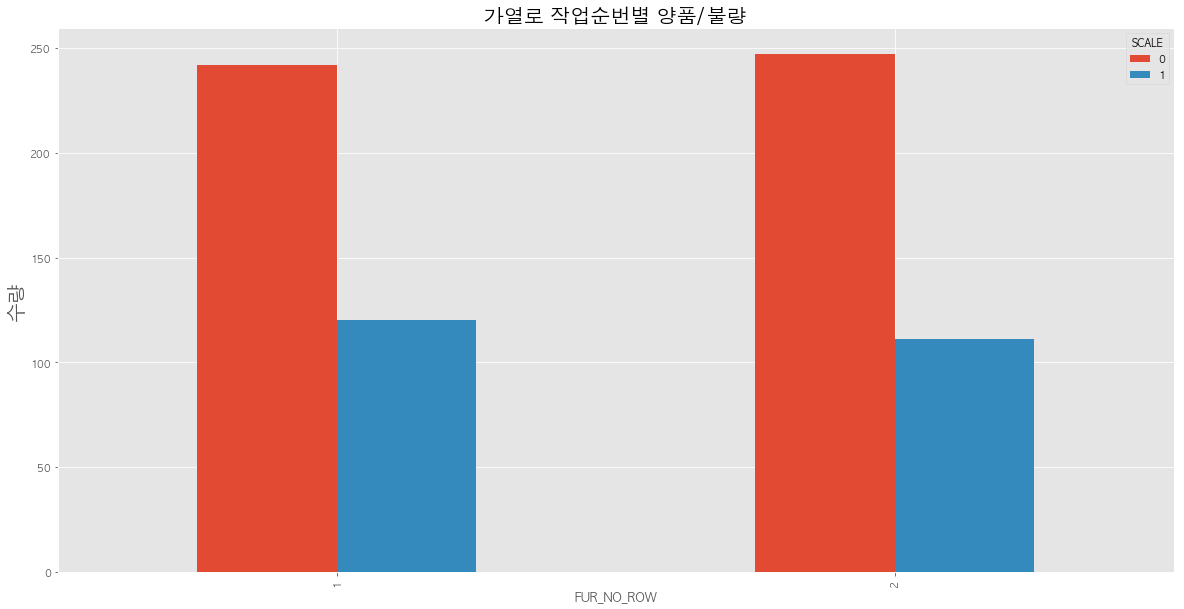

In [110]:
df_bar1 = df_raw.groupby(["SCALE", "FUR_NO_ROW"])["SCALE"].count().unstack("SCALE")
df_bar1.plot(kind = "bar", figsize = (20, 10))
plt.style.use("ggplot")
plt.title("가열로 작업순번별 양품/불량", fontsize = 20)
plt.ylabel("수량", fontsize = 20)

In [111]:
#가열로 작업 순번별 불량율은 큰 차이를 보이지 않기 때문에 제외한다.

Text(0, 0.5, '수량')

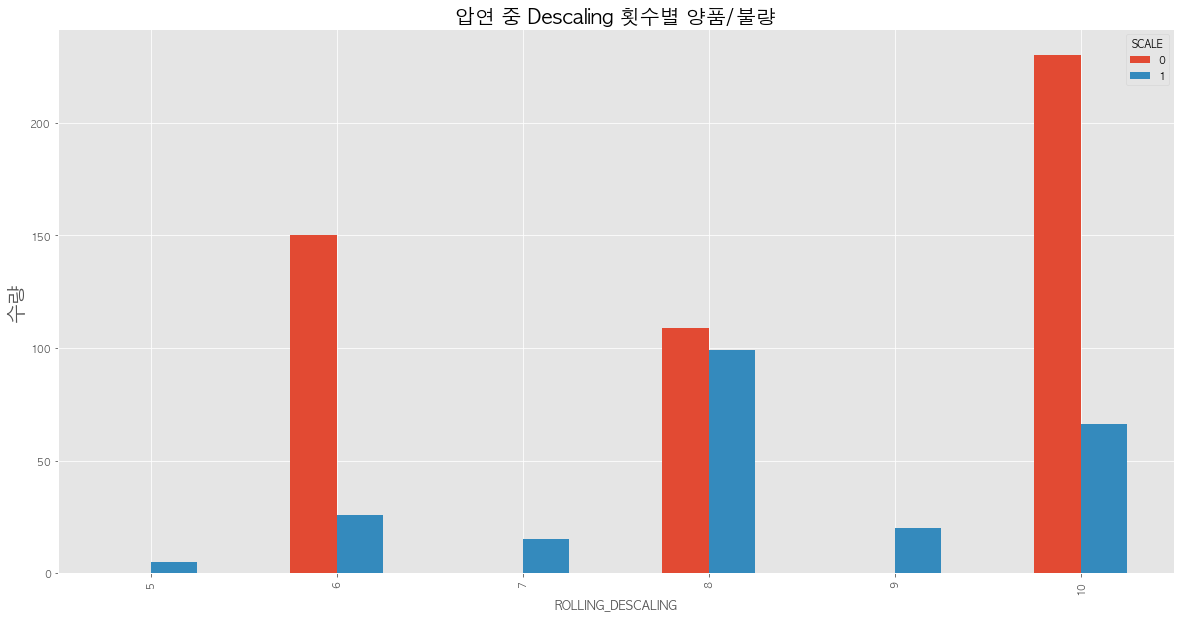

In [112]:
df_bar1 = df_raw.groupby(["SCALE", "ROLLING_DESCALING"])["SCALE"].count().unstack("SCALE")
df_bar1.plot(kind = "bar", figsize = (20, 10))
plt.style.use("ggplot")
plt.title("압연 중 Descaling 횟수별 양품/불량", fontsize = 20)
plt.ylabel("수량", fontsize = 20)

In [113]:
#8번 디스케일링한 것이 불량율이 확연히 높지만 디스케일링과 불량율의 특별한 추세를 알 수 없기 때문에 변수로 활용한다.

Text(0, 0.5, '수량')

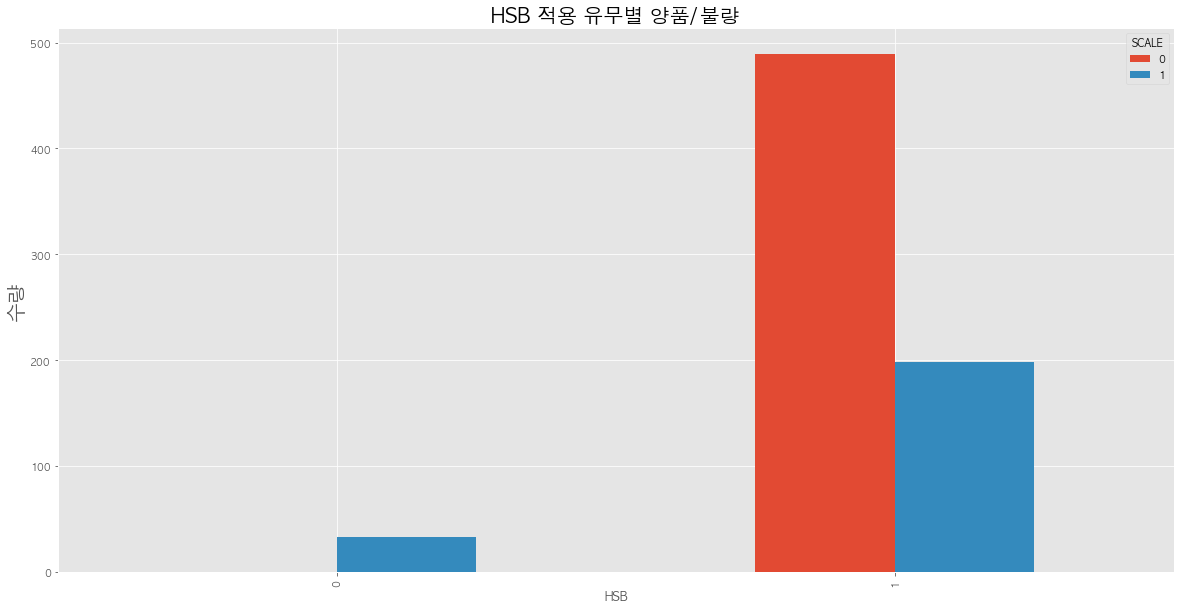

In [114]:
df_bar1 = df_raw.groupby(["SCALE", "HSB"])["SCALE"].count().unstack("SCALE")
df_bar1.plot(kind = "bar", figsize = (20, 10))
plt.style.use("ggplot")
plt.title("HSB 적용 유무별 양품/불량", fontsize = 20)
plt.ylabel("수량", fontsize = 20)

In [115]:
#HSB미적용시 전체 불량이 난 것으로 확인된다.
#불량율에 절대적으로 큰 영향을 미치는 것으로 판명하고, HSB 미적용에 따른 불량은 제외하고 분석한다.

Text(0, 0.5, '수량')

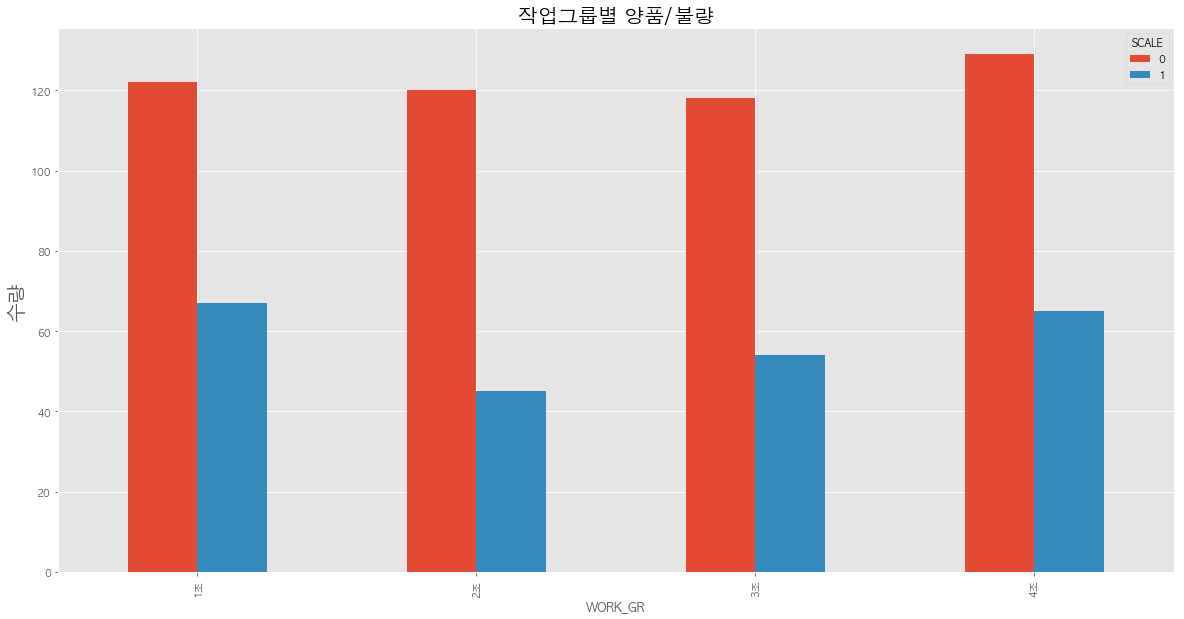

In [116]:
df_bar1 = df_raw.groupby(["SCALE", "WORK_GR"])["SCALE"].count().unstack("SCALE")
df_bar1.plot(kind = "bar", figsize = (20, 10))
plt.style.use("ggplot")
plt.title("작업그룹별 양품/불량", fontsize = 20)
plt.ylabel("수량", fontsize = 20)

In [95]:
#각 작업 그룹의 불량율에 차이를 보이지만 확연한 차이를 보이는 것으로 생각하기 힘들기 때문에 검정을 통해 확인한다.

# 데이터 전처리(연속형 변수)

In [118]:
df_raw = pd.read_csv("~/Google 드라이브/Bigdata/data_file/SCALE불량.csv",engine="python", encoding = "EUC-KR")
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조
5,PB562779,2008-08-01:00:02:06,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1143,127,1128,57,314,1128,874,적용,8,4조
6,PB562780,2008-08-01:00:02:28,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,...,1138,126,1130,50,289,1130,878,적용,8,2조
7,PB562781,2008-08-01:00:02:21,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,...,1139,126,1131,52,294,1131,870,적용,8,4조
8,PB562782,2008-08-01:00:02:51,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,2호기,...,1127,126,1122,52,293,1122,873,적용,8,1조
9,PB562783,2008-08-01:00:03:15,양품,COMMON,T8,38.43,3129,16187,15280,2호기,...,1135,119,1124,73,298,1124,881,적용,8,4조


In [119]:
df_raw = df_raw[df_raw["ROLLING_TEMP_T5"] > 200]
df_raw.reset_index(drop = True, inplace = True)
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조
5,PB562779,2008-08-01:00:02:06,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1143,127,1128,57,314,1128,874,적용,8,4조
6,PB562780,2008-08-01:00:02:28,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,...,1138,126,1130,50,289,1130,878,적용,8,2조
7,PB562781,2008-08-01:00:02:21,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,...,1139,126,1131,52,294,1131,870,적용,8,4조
8,PB562782,2008-08-01:00:02:51,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,2호기,...,1127,126,1122,52,293,1122,873,적용,8,1조
9,PB562783,2008-08-01:00:03:15,양품,COMMON,T8,38.43,3129,16187,15280,2호기,...,1135,119,1124,73,298,1124,881,적용,8,4조


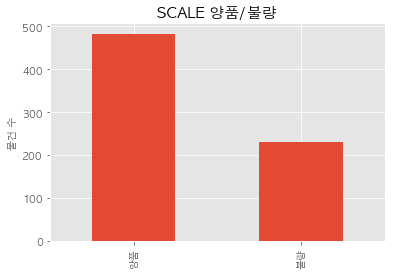

In [120]:
df_bar = df_raw["SCALE"].value_counts()
plt.style.use("ggplot")
plt.title("SCALE 양품/불량", fontsize = 15)
plt.ylabel("물건 수", fontsize = 10)
df_bar.plot.bar()

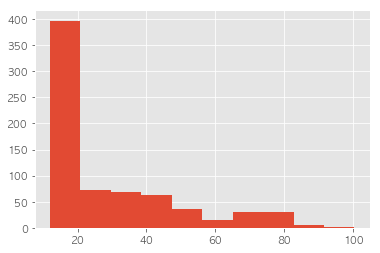

In [15]:
df_raw["PT_THK"].hist()

In [50]:
df_PT_THK1 = df_raw["PT_THK"][df_raw.SCALE == '양품']
df_PT_THK2 = df_raw["PT_THK"][df_raw.SCALE == '불량']

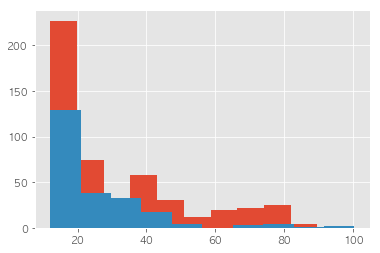

In [54]:
df_PT_THK1.hist()
df_PT_THK2.hist()

In [53]:
t_result = stats.ttest_ind(df_PT_THK1, df_PT_THK2)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t검정통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t검정통계량 : 3.249
p-value : 0.001


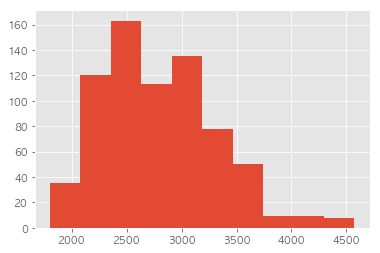

In [16]:
df_raw["PT_WDTH"].hist()

In [55]:
df_PT_WDTH1 = df_raw["PT_WDTH"][df_raw.SCALE == '양품']
df_PT_WDTH2 = df_raw["PT_WDTH"][df_raw.SCALE == '불량']

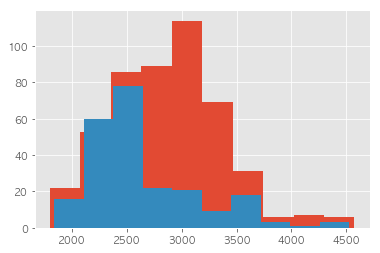

In [56]:
df_PT_WDTH1.hist()
df_PT_WDTH2.hist()

In [57]:
t_result = stats.ttest_ind(df_PT_WDTH1, df_PT_WDTH2)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t검정통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t검정통계량 : 5.777
p-value : 0.0


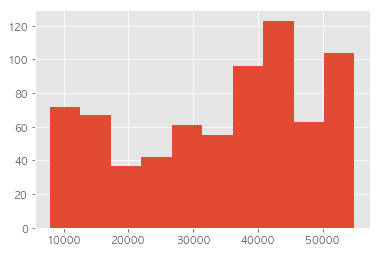

In [20]:
df_raw["PT_LTH"].hist()

In [58]:
df_PT_LTH1 = df_raw["PT_LTH"][df_raw.SCALE == '양품']
df_PT_LTH2 = df_raw["PT_LTH"][df_raw.SCALE == '불량']

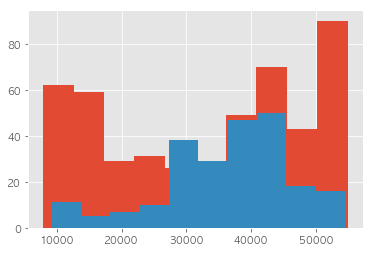

In [59]:
df_PT_LTH1.hist()
df_PT_LTH2.hist()

In [60]:
t_result = stats.ttest_ind(df_PT_LTH1, df_PT_LTH2)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t검정통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t검정통계량 : -2.608
p-value : 0.009


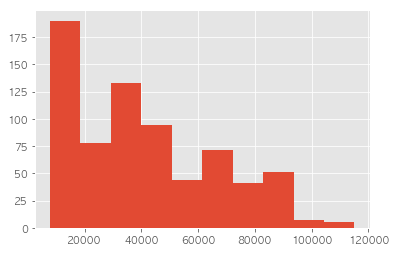

In [61]:
df_raw["PT_WGT"].hist()

In [62]:
df_PT_WGT1 = df_raw["PT_WGT"][df_raw.SCALE == '양품']
df_PT_WGT2 = df_raw["PT_WGT"][df_raw.SCALE == '불량']

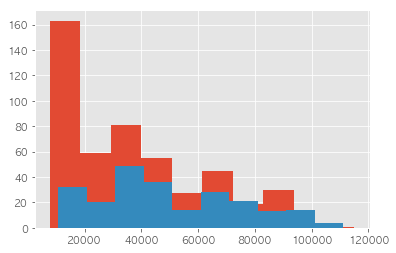

In [63]:
df_PT_WGT1.hist()
df_PT_WGT2.hist()

In [64]:
t_result = stats.ttest_ind(df_PT_WGT1, df_PT_WGT2)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t검정통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t검정통계량 : -5.989
p-value : 0.0


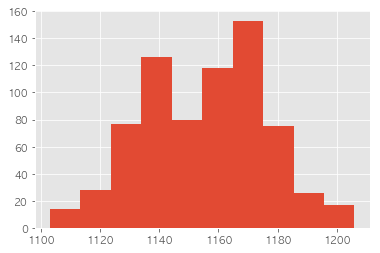

In [65]:
df_raw["FUR_HZ_TEMP"].hist()

In [66]:
df_FUR_HZ_TEMP1 = df_raw["FUR_HZ_TEMP"][df_raw.SCALE == '양품']
df_FUR_HZ_TEMP2 = df_raw["FUR_HZ_TEMP"][df_raw.SCALE == '불량']

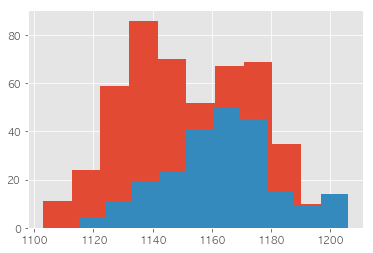

In [67]:
df_FUR_HZ_TEMP1.hist()
df_FUR_HZ_TEMP2.hist()

In [68]:
t_result = stats.ttest_ind(df_FUR_HZ_TEMP1, df_FUR_HZ_TEMP2)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t검정통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t검정통계량 : -6.757
p-value : 0.0


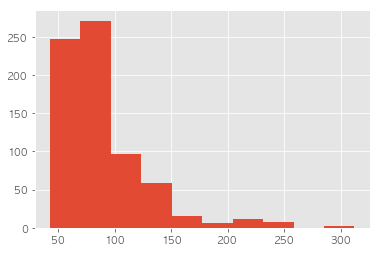

In [69]:
df_raw["FUR_HZ_TIME"].hist()

In [70]:
df_FUR_HZ_TIME1 = df_raw["FUR_HZ_TIME"][df_raw.SCALE == '양품']
df_FUR_HZ_TIME2 = df_raw["FUR_HZ_TIME"][df_raw.SCALE == '불량']

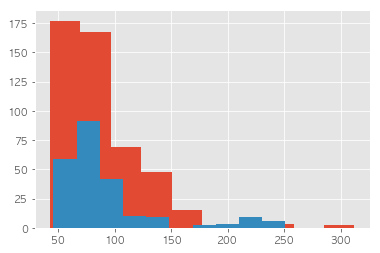

In [71]:
df_FUR_HZ_TIME1.hist()
df_FUR_HZ_TIME2.hist()

In [72]:
t_result = stats.ttest_ind(df_FUR_HZ_TIME1, df_FUR_HZ_TIME2)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t검정통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t검정통계량 : -1.488
p-value : 0.137


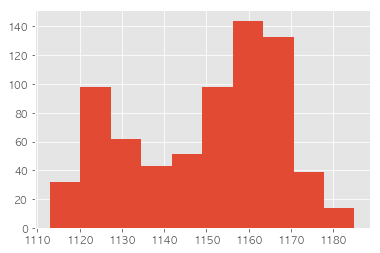

In [73]:
df_raw["FUR_SZ_TEMP"].hist()

In [74]:
df_FUR_SZ_TEMP1 = df_raw["FUR_SZ_TEMP"][df_raw.SCALE == '양품']
df_FUR_SZ_TEMP2 = df_raw["FUR_SZ_TEMP"][df_raw.SCALE == '불량']

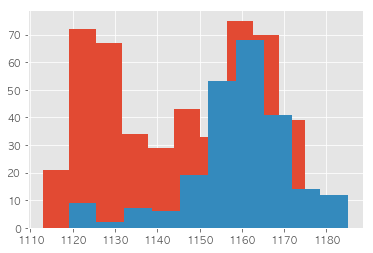

In [75]:
df_FUR_SZ_TEMP1.hist()
df_FUR_SZ_TEMP2.hist()

In [76]:
t_result = stats.ttest_ind(df_FUR_SZ_TEMP1, df_FUR_SZ_TEMP2)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t검정통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t검정통계량 : -10.768
p-value : 0.0


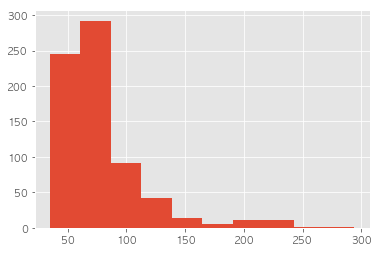

In [77]:
df_raw["FUR_SZ_TIME"].hist()

In [78]:
df_FUR_SZ_TIME1 = df_raw["FUR_SZ_TIME"][df_raw.SCALE == '양품']
df_FUR_SZ_TIME2 = df_raw["FUR_SZ_TIME"][df_raw.SCALE == '불량']

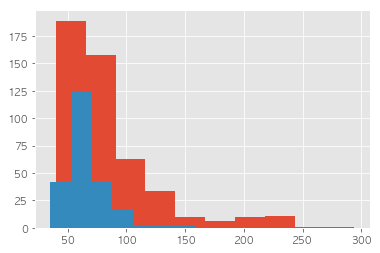

In [79]:
df_FUR_SZ_TIME1.hist()
df_FUR_SZ_TIME2.hist()

In [80]:
t_result = stats.ttest_ind(df_FUR_SZ_TIME1, df_FUR_SZ_TIME2)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t검정통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t검정통계량 : 6.672
p-value : 0.0


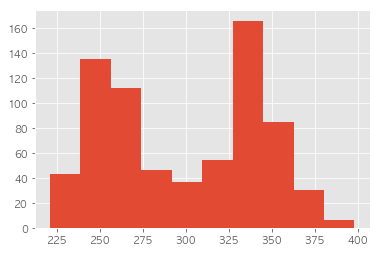

In [81]:
df_raw["FUR_TIME"].hist()

In [82]:
df_FUR_TIME1 = df_raw["FUR_TIME"][df_raw.SCALE == '양품']
df_FUR_TIME2 = df_raw["FUR_TIME"][df_raw.SCALE == '불량']

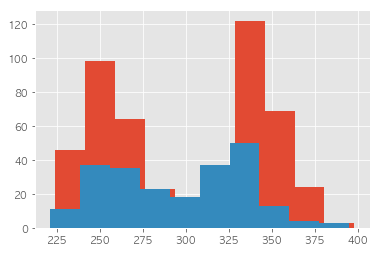

In [83]:
df_FUR_TIME1.hist()
df_FUR_TIME2.hist()

In [84]:
t_result = stats.ttest_ind(df_FUR_TIME1, df_FUR_TIME2)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t검정통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t검정통계량 : 1.17
p-value : 0.242


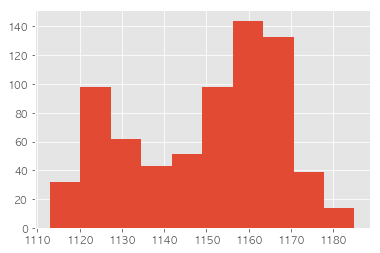

In [85]:
df_raw["FUR_EXTEMP"].hist()

In [86]:
df_FUR_EXTEMP1 = df_raw["FUR_EXTEMP"][df_raw.SCALE == '양품']
df_FUR_EXTEMP2 = df_raw["FUR_EXTEMP"][df_raw.SCALE == '불량']

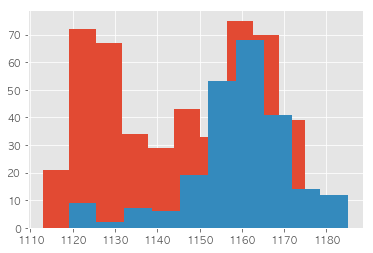

In [87]:
df_FUR_EXTEMP1.hist()
df_FUR_EXTEMP2.hist()

In [88]:
t_result = stats.ttest_ind(df_FUR_EXTEMP1, df_FUR_EXTEMP2)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t검정통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t검정통계량 : -10.768
p-value : 0.0


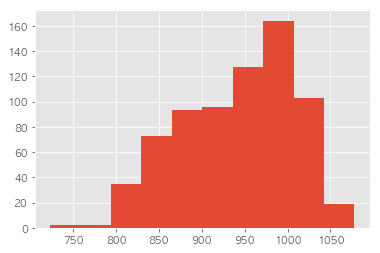

In [89]:
df_raw["ROLLING_TEMP_T5"].hist()

In [90]:
df_ROLLING_TEMP_T51 = df_raw["ROLLING_TEMP_T5"][df_raw.SCALE == '양품']
df_ROLLING_TEMP_T52 = df_raw["ROLLING_TEMP_T5"][df_raw.SCALE == '불량']

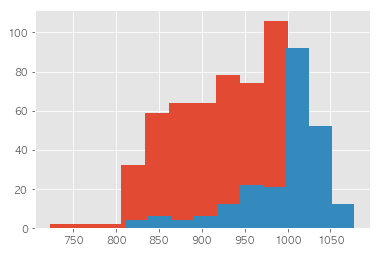

In [91]:
df_ROLLING_TEMP_T51.hist()
df_ROLLING_TEMP_T52.hist()

In [92]:
t_result = stats.ttest_ind(df_ROLLING_TEMP_T51, df_ROLLING_TEMP_T52)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t검정통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t검정통계량 : -17.68
p-value : 0.0
